# **`Assignment Questions 6`**

**Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

**LOGIC**: basically you just need to simply run D towards decrement from the length of s and I towards increment. That is if s="DDD" then output is [3,2,1,0] where first 3 of array is denoting length of s and being decrementd by 1 each time when "D" occurs again. if there was I also, lets suppose "DIIIDI" then D will be decrementing and I will be incrementing by1. output => [6,0,1,2,5,3,4].

Note :- D will start from the length of s and will be decreasing by 1 whenever "D" occurs again, and I will start from 0 and will be increasing by 1 whenever "I" occurs again. at the end I and D will be on same position so just push any of them in to the array at the end, and you will get your output.

In [7]:
s = "IDID"
def diStringMatch(s: str) -> list[int]:
        ans = []
        low = 0
        high = len(s)
        for i in s:
            if i=="I":
                ans.append(low)
                low+=1
            else:
                ans.append(high)
                high-=1
        ans.append(high)
        return ans
diStringMatch(s)

[0, 4, 1, 3, 2]

**Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**

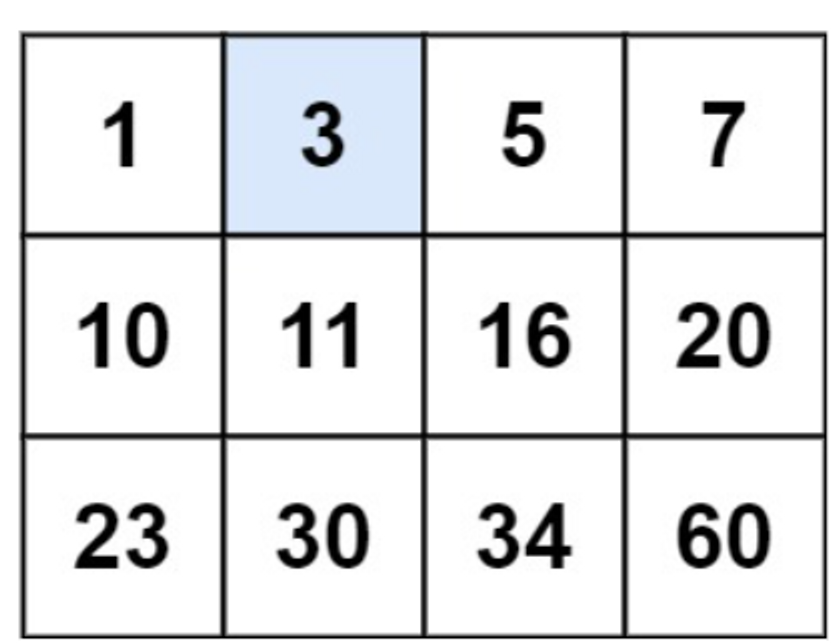


**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true

In [21]:
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
target = 3
def searchMatrix(matrix: list[list[int]], target: int) -> bool:
    rows = len(matrix)
    cols = len(matrix[0])
    row = 0
    for row in range(rows):
        if matrix[row][0] > target:
            row = row - 1
            break
    else:
        row = rows - 1
    for i in range(cols):
        if matrix[row][i] == target:
            return(True)
            break
    return(False)
searchMatrix(matrix , target)
        

True

**Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]


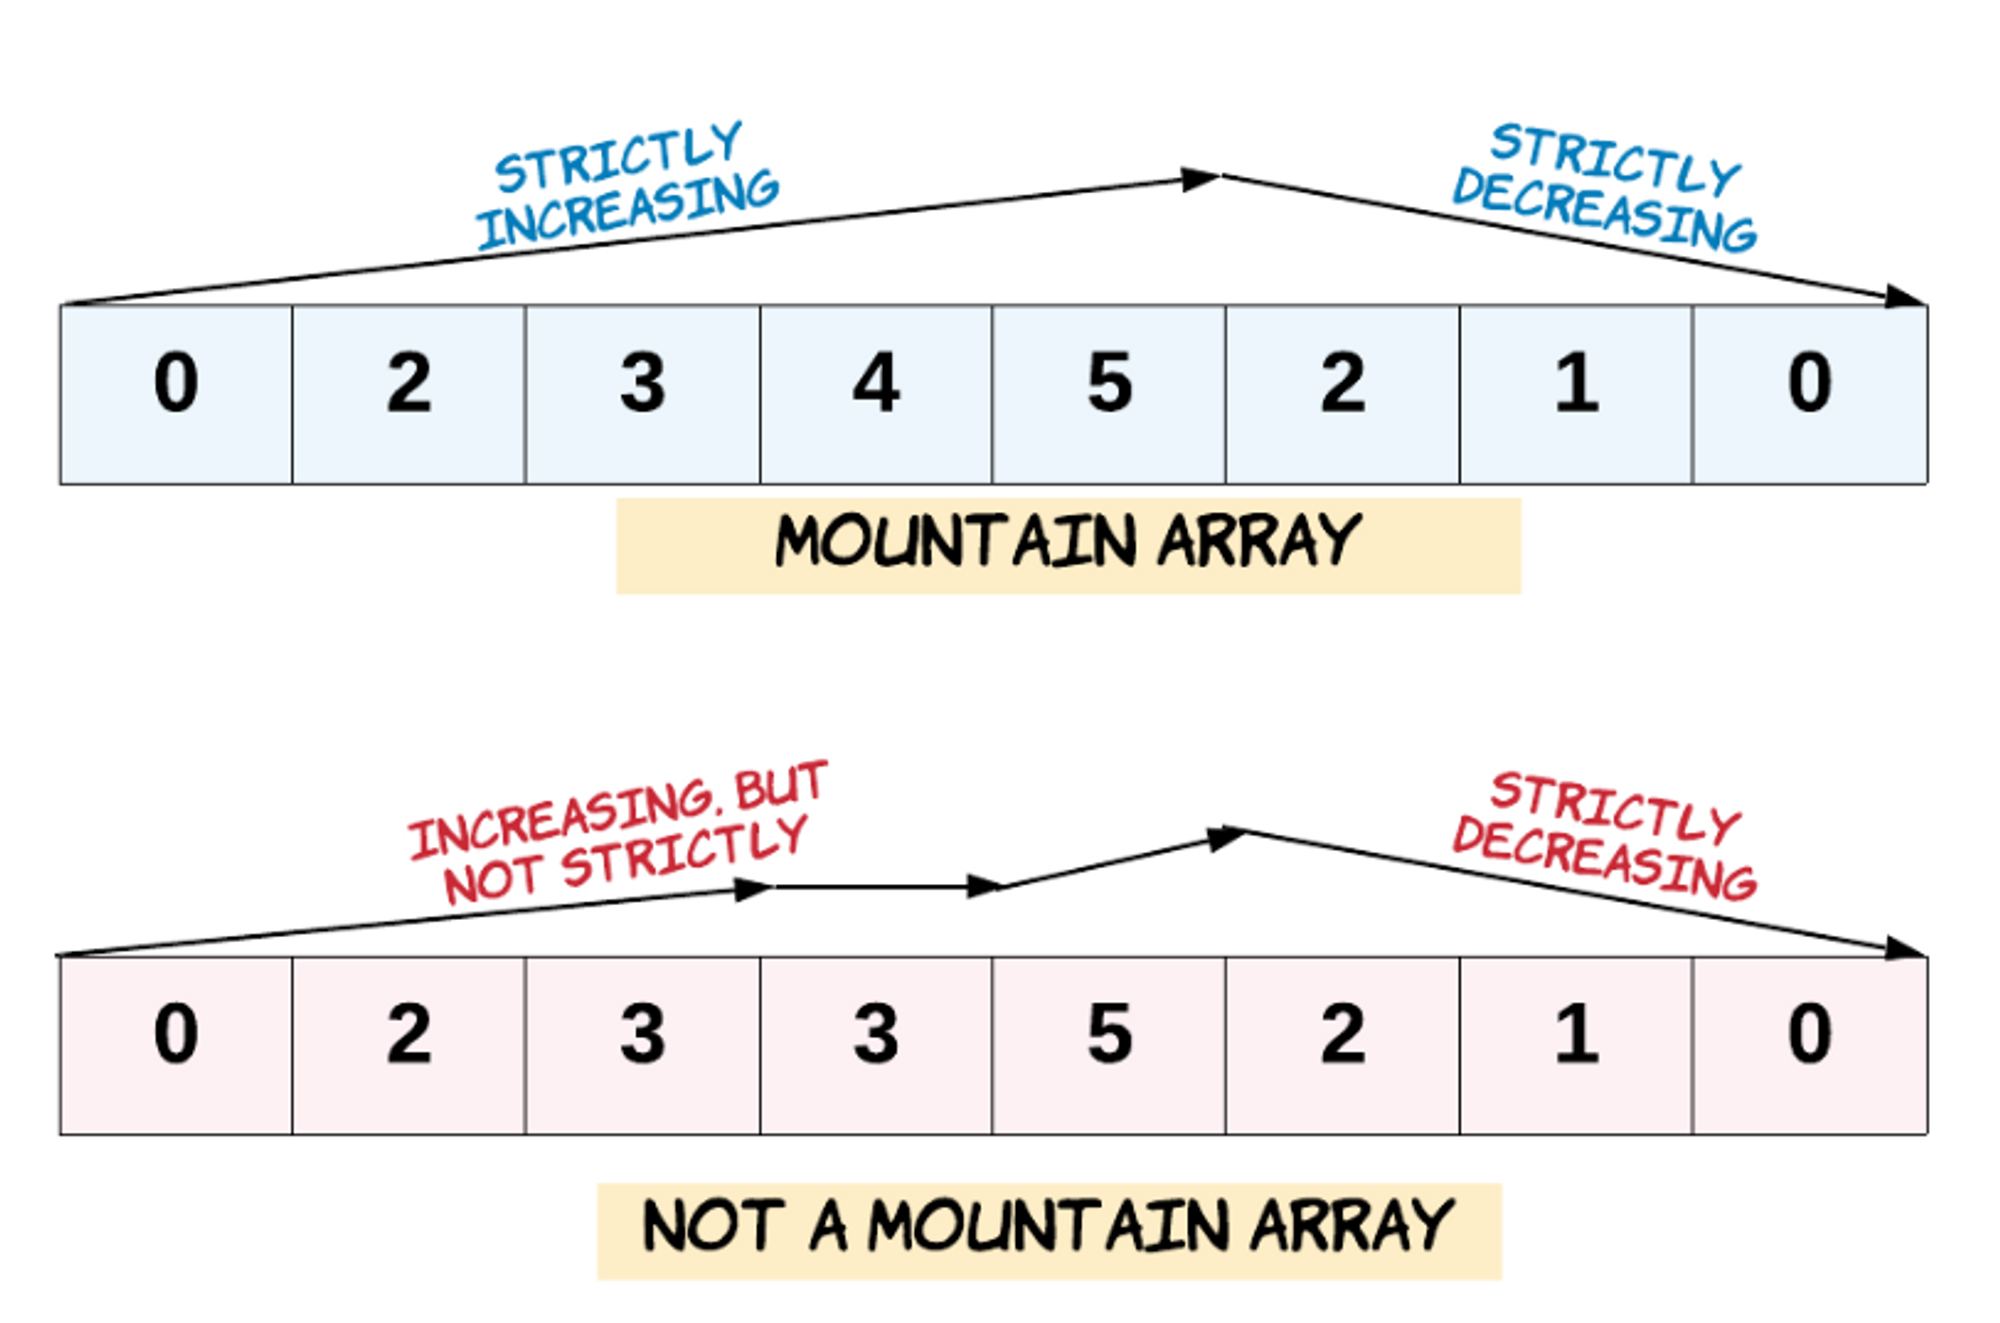

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false

In [41]:
arr = [2,1]

def validMountainArray(arr: list[int]) -> bool:
    m = arr.index(max(arr))
    if m == 0 or m == len(arr) -1:
        print(False)
    else:
        flag = True
        i = 0
        while (i < m):
            if arr[i] >= arr[i+1]:
                flag = False
                break
            else:
                i+=1
        i = m+1
        if (flag):
            while i < len(arr):
                if arr[i-1] <= arr[i]:
                    return False
                    break
                else:
                    i+=1
        else:
            return False
        return True
validMountainArray(arr)   

False


Question 4


Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

In [2]:
arr = [0,1,0]
def findMaxLength(nums: list[int]) -> int:
    max_length =0
    hash={}
    count=0
    for i in range(len(nums)):
        current=nums[i]
        if current==0:
            count-=1 # decrement our count if our current element is 0
        else:
            # increment our count if current element is 1
            count+=1

        if count==0:
            # if count is 0, we have a new subarray with length+1
            max_length=i+1
        if count in hash:
            max_length=max(max_length,i-hash[count]) 
        else:
            hash[count]=i
    return max_length
findMaxLength(arr)

2

**Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.


**LOGIC**: The idea is to multiply minimum element of one array to maximum element of another array. Algorithm to solve this problem:  

1. Sort both the arrays A and B.
2. Traverse the array and for each element, multiply A[i] and B[n – i – 1] and add to the total.

Note: We are adding multiplication of elements which can lead to overflow conditions.

Below image is an illustration of the above approach: 

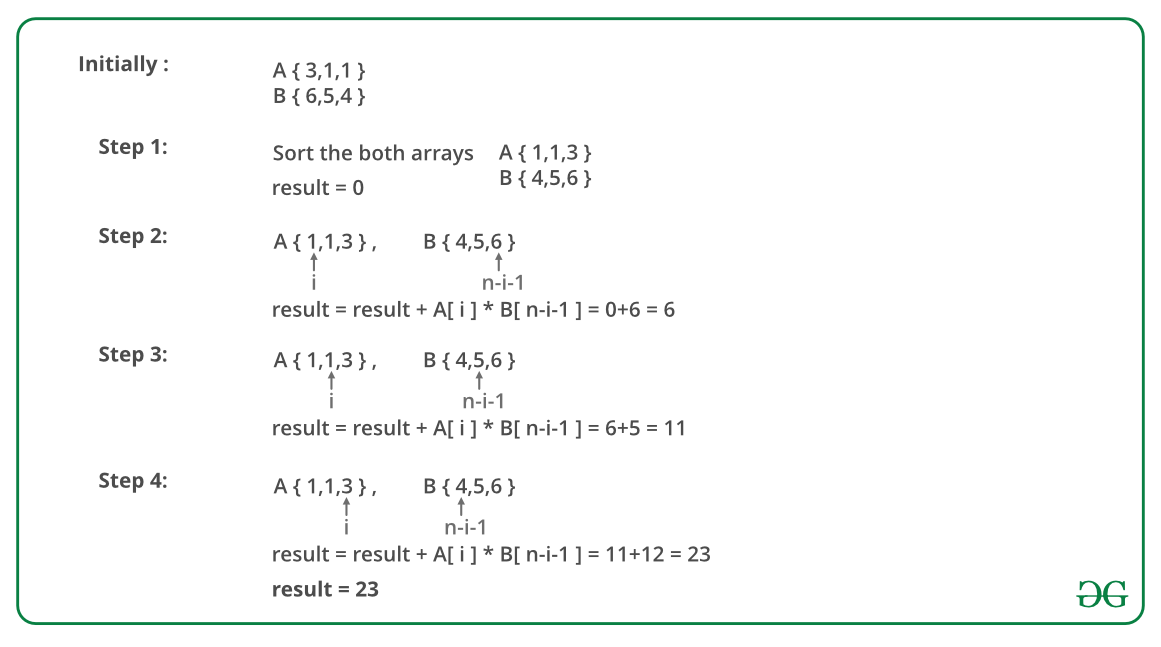



In [5]:
nums1 = [5,3,4,2]
nums2 = [4,2,2,5]
def minProductSum(nums1:list[int], nums2:list[int])->int:
    """calculates and returns the minimum product of 2 arrays
    nums1 and nums2

    Args:
        nums1 (list[int]): array of numbers
        nums2 (list[int]): array of numbers

    Returns:
        int: minimum product sum of 2 arrays
    """
    nums1.sort()
    nums2.sort()
    n = len(nums1)

    result = 0
    for i in range(n):
        result += (nums1[i] * nums2[n-i-1])

    return(result)
minProductSum(nums1, nums2)


40

**Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

In [6]:
changed = [1,3,4,2,6,8]
def findOriginalArray(changed: list[int]) -> list[int]:
    """checks if an array is doubled and returns the original
    array or empty list

    Args:
        changed (list[int]): doubled array

    Returns:
        list[int]: original array
    """
    from collections import Counter
    if len(changed)%2!=0:return []
    changed.sort()
    c=Counter(changed)
    ans=[]
    if c[0]%2==0:
        ans+=[0]*(c[0]//2)
        
    for i in c:
        if i==0 or c[i]==0:
            continue
        elif (i*2 not in c) or c[i]>c[i*2]:
            return []
        c[i*2]-=c[i]
        ans+=[i]*c[i]
            
    return ans
findOriginalArray(changed)

[1, 3, 4]

**Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**

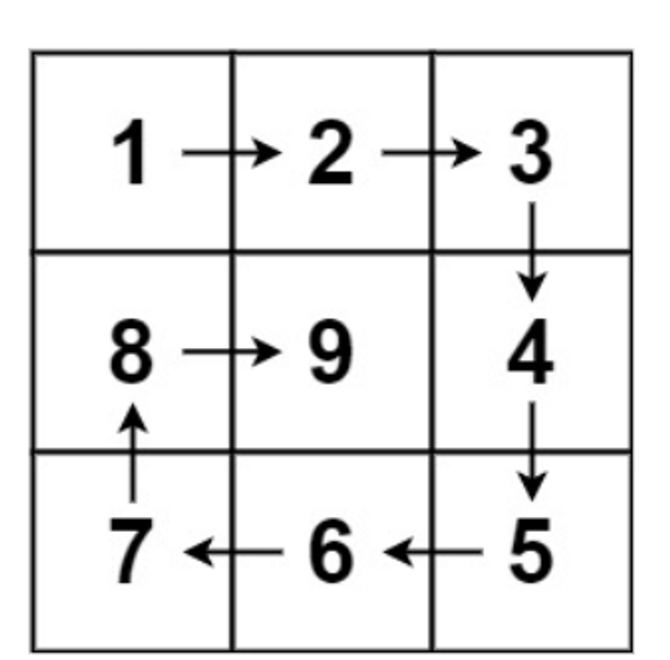

**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

Approach 1: Traverse Layer by Layer in Spiral Form
Intuition

If we try to build a pattern for a given nnn, we observe that the pattern repeats after completing one circular traversal around the matrix. Let's call this one circular traversal as layer. We start traversing from the outer layer and move towards inner layers on every iteration.

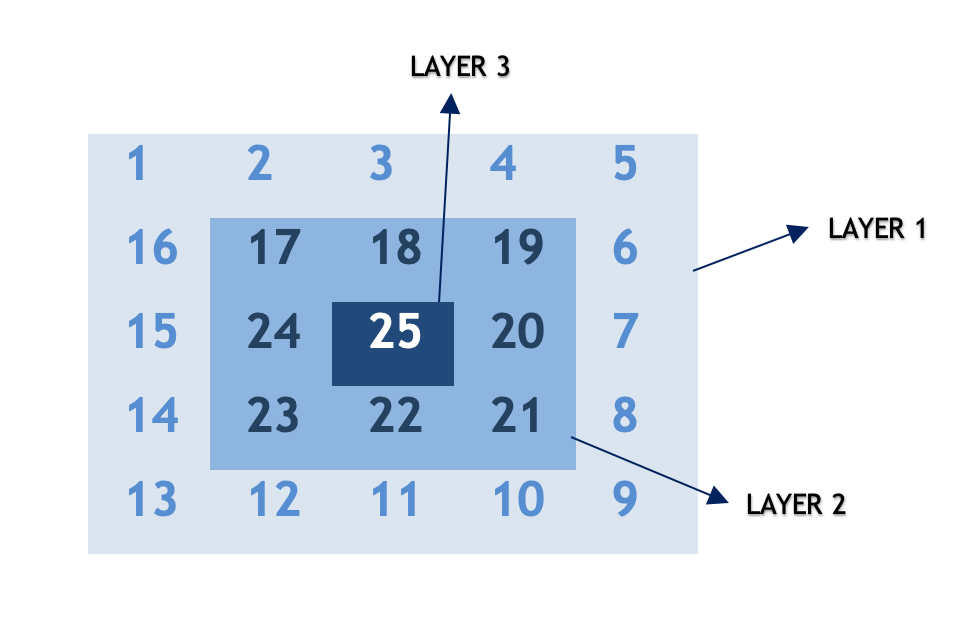

Algorithm

Let's devise an algorithm for the spiral traversal:

We can observe that, for any given nnn, the total number of layers is given by :
⌊n+12⌋\lfloor \frac{n+1}{2} \rfloor⌊ 
2
n+1
​
 ⌋
This works for both even and odd nnn.
Example

For n=3n = 3n=3, layers=2layers = 2layers=2

For n=6n = 6n=6, total layers=3layers = 3layers=3

Also, for each layer, we traverse in at most 4 directions :

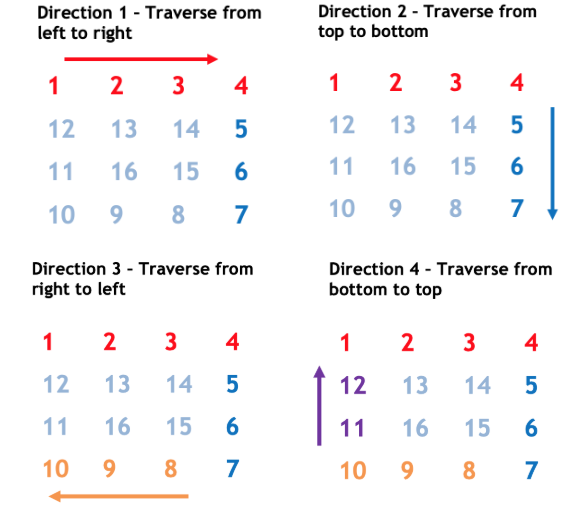

In every direction, either row or column remains constant and other parameter changes (increments/decrements).

Direction 1: From top left corner to top right corner.

The row remains constant as layer\text{layer}layer and column increments from layer\text{layer}layer to n−layer−1n-\text{layer}-1n−layer−1

Direction 2: From top right corner to the bottom right corner.

The column remains constant as n−layer−1n-layer-1n−layer−1 and row increments from
layer+1\text{layer}+1layer+1 to n−layern-\text{layer}n−layer.

Direction 3: From bottom right corner to bottom left corner.

The row remains constant as n−layer−1n-\text{layer}-1n−layer−1 and column decrements from n−layer−2n-\text{layer}-2n−layer−2 to layer\text{layer}layer.

Direction 4: From bottom left corner to top left corner.

The column remains constant as layer\text{layer}layer and column decrements from n−layer−2n-\text{layer}-2n−layer−2 to layer+1\text{layer}+1layer+1.

This process repeats (n+1)/2(n+1)/2(n+1)/2 times until all layers are traversed.

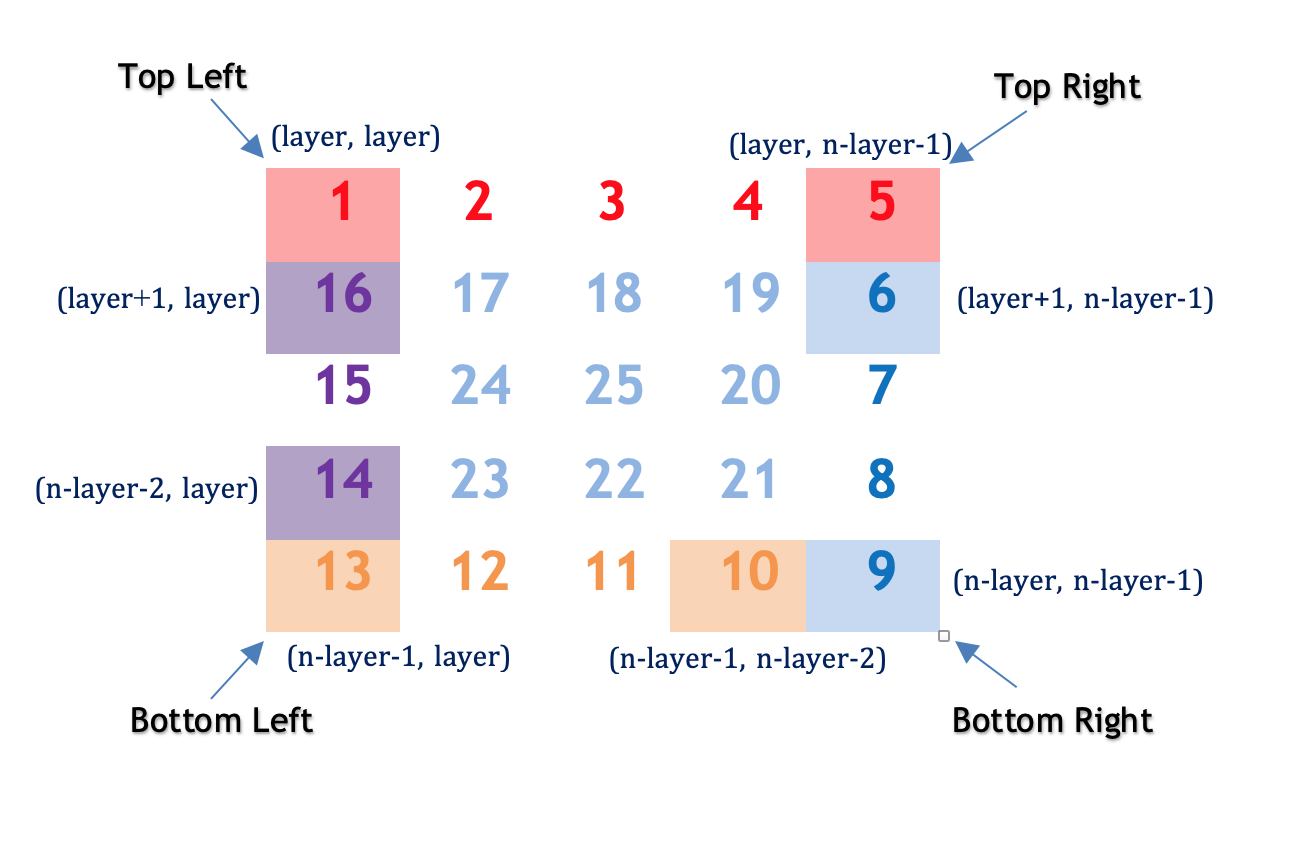

Approach
We initialize a 2D matrix of size n x n. We keep track of the current cell that we are in using (r, c), and the direction in which we are moving using (dr, dc).

Initially, we start from the cell (0,0) and move towards the right. For each cell, we assign a number starting from 1. If the next cell in the current direction is out of bounds or already assigned, we turn 90 degrees to the right.

Complexity Analysis
Time complexity: The time complexity is O(n2), where n is the input number. This is because we have to fill up n² cells in the matrix.

Space Complexity: The space complexity is also O(n2), as we need to allocate a 2D array of size n x n to store the resulting matrix.

In [10]:
n = 3
def generateMatrix(n: int) -> list[list[int]]:
        matrix = [[0]*n for _ in range(n)]
        r, c, dr, dc = 0, 0, 0, 1
        for current in range(1, n*n + 1):
            matrix[r][c] = current
            if not (0 <= r + dr < n and 0 <= c + dc < n and matrix[r + dr][c + dc] == 0):
                dr, dc = dc, -dr
            r += dr
            c += dc
        return matrix
generateMatrix(3)


[[1, 2, 3], [8, 9, 4], [7, 6, 5]]

**Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

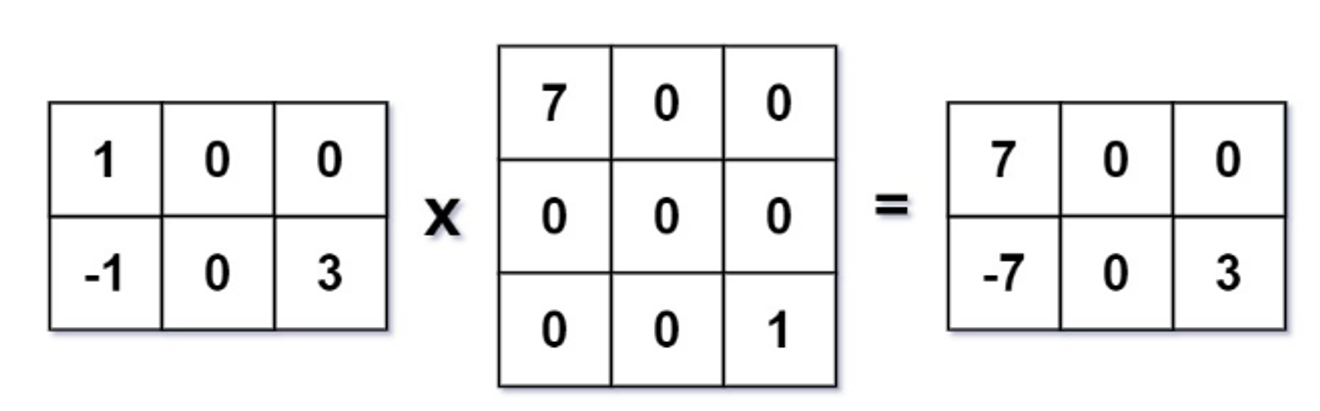

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]


In [2]:
mat1 = [[1,0,0],[-1,0,3]]
mat2 = [[7,0,0],[0,0,0],[0,0,1]]
def multiply(mat1: list[list[int]], mat2: list[list[int]]) -> list[list[int]]:
  """sparse matrix multiplication of two matrices
  m X l and l x n

  Args:
      mat1 (list[list[int]]): sparse matrix m x l
      mat2 (list[list[int]]): sparse matrix l x n

  Returns:
      list[list[int]]: resulting matrix
  """
  m = len(mat1)
  n = len(mat2)
  l = len(mat2[0])
  ans = [[0] * l for _ in range(m)]
  nonZeroColIndicesInMat2 = [
      [j for j, a in enumerate(row) if a]
      for row in mat2
  ]

  for i in range(m):
    for j, a in enumerate(mat1[i]):
      if a == 0:
        continue
      # mat1's j-th column matches mat2's j-th row
      for colIndex in nonZeroColIndicesInMat2[j]:
        ans[i][colIndex] += a * mat2[j][colIndex]

  return ans
multiply(mat1, mat2)

[[7, 0, 0], [-7, 0, 3]]